# Lineare Regression
In diesem Notebook realisieren wir einige Beispiele für die Lineare Regression. Wir beginnen mit einem sehr einfachen Beispiel. Wir laden den Datensatz mit Daten über Autos, der u.a. den Verbrauch der Autos und deren Gewicht enthält.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/autos.csv"

autos = pd.read_csv(url)
autos.head()



,Verbrauch,Leistung,Gewicht
0,11.20,82,1310
1,11.20,82,1437
2,10.32,69,1160
3,10.99,82,1607
4,12.58,130,1720


Wir plotten die Daten (Scatterplot) mit Hilfe der Funktion *scatterplot* aus dem Seaborn-Package.

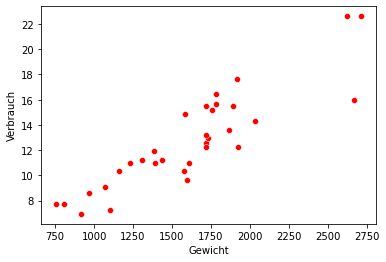

In [2]:
import seaborn as sns
_=sns.scatterplot(data=autos, x="Gewicht", y="Verbrauch", color="red")

Mit Seaborn können wir auch sehr einfach eine Regressionsgerade einzeichnen. Wir verwenden hierfür die Funktion *regplot*.

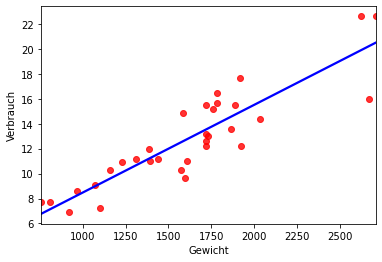

In [3]:
_=sns.regplot(data=autos, x="Gewicht", y="Verbrauch", color="red", ci=None, line_kws={"color": "blue"})

Nun erstellen wir ein Modell für die Lineare Regression mit Hilfe der Funktion *ols* aus dem Package *statsmodells*. Es gibt auch viele andere Möglichkeiten, dies in Python zu realisieren, aber *statsmodels* ist sehr mächtig, insbesondere was die Verwendung von kategorialen Variablen angeht (dazu später ein Beispiel). Der Funktion *ols* übergeben wir u.a. eine "Formula", die definiert, was die abhängige Variable (Y-Werte) und was die unabhängige(n) Variable(n) sein soll(en), und zwar in der Form "Y~X", gelesen as: Y ist Abhängig von X.



In [4]:
import statsmodels.formula.api as smf 
model = smf.ols("Verbrauch~Gewicht", data=autos).fit()

Wir geben die Koeffizienten aus.

In [5]:
model.params

Intercept    1.454423
Gewicht      0.007026
dtype: float64

Mit Hilfe der Funktion *summary* erhalten wir umfangreiche Informationen über die Modellqualität.

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Verbrauch   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           9.61e-12
Time:                        08:35:02   Log-Likelihood:                -63.029
No. Observations:                  32   AIC:                             130.1
Df Residuals:                      30   BIC:                             133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4544      1.104      1.317      0.198      -0.801       3.709
Gewicht        0.0070      0.001     10.683      0.000       0.006       0.008
==============================================================================
Omnibus:                        0.938   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.948
Skew:                          -0.354   Prob(JB):                        0.623
Kurtosis:                       2.542   Cond. No.                     5.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eine wichtige Kennzahl für die Qualität eines Regressionsmodells ist das sog. **Bestimmtheitsmaß** $R^2$. Die Tabelle oben gibt hierfür einen Wert von 0,984 an. Dieser kann auch manuell mit folgender Formel berechnet werden:

$R^2=1-\frac{\sum (y_{i}-\hat{y})^{2}}{\sum (y_{i}-\bar{y})^{2}}$

Das gleiche Ergebnis erhalten wir mit:

In [7]:
1 - (((autos.Verbrauch-model.predict(autos.Gewicht))**2).sum() / ((autos.Verbrauch-autos.Verbrauch.mean())**2).sum() )

0.7918519268482953

In [8]:
from scipy.stats import pearsonr
corr,__ = pearsonr(autos.Gewicht, autos.Verbrauch)
print(corr)

0.8898606221472525


## Noch ein Beispiel: Bierpreis auf dem Oktoberfest
Wir laden reale Daten (Quelle: Open Data Portal der Stadt München) bzgl. der Bierpreisentwicklung auf dem Oktoberfest:

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/oktoberfestbierpreis19852018.csv"
bierpreise = pd.read_csv(url)
bierpreise.head()

,jahr,bier_preis
0,1985,3.20
1,1986,3.30
2,1987,3.37
3,1988,3.45
4,1989,3.60


Wir erstellen einen Scatterplot:

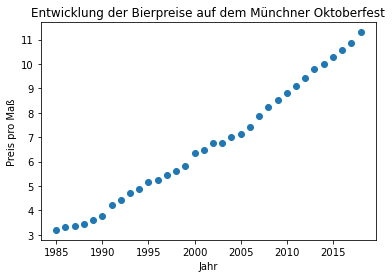

In [10]:
import matplotlib.pyplot as plt
plt.scatter(bierpreise.jahr, bierpreise.bier_preis)
plt.xlabel("Jahr")
plt.ylabel("Preis pro Maß")
plt.title("Entwicklung der Bierpreise auf dem Münchner Oktoberfest")
plt.show()

Offensichtlich ein erstaunlich linearer Zusammenhang! Wir erstellen ein Modell:

In [11]:
import statsmodels.formula.api as smf 
model = smf.ols("bier_preis~jahr", data=bierpreise).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bier_preis   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3234.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.02e-33
Time:                        08:35:02   Log-Likelihood:               0.063952
No. Observations:                  34   AIC:                             3.872
Df Residuals:                      32   BIC:                             6.925
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -488.5857      8.710    -56.093      0.000    -506.328    -470.843
jahr           0.2475      0.004     56.866      0.000       0.239       0.256
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.469
Skew:                           0.253   Prob(JB):                        0.791
Kurtosis:                       2.725   Cond. No.                     4.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Das Modell verfügt über ein Bestimmtheitsmaß $R^2$ von 0,99! Die Koeffizienten zeigen, dass pro Jahr die Maß Bier im Mittel um ca. 25 Cent teuerer wurde!

## Berechnung der Koeffizienten mit Hilfe der Linearen Algebra
Wir erstellen eine Funktion, die die Koeffizienten mit Hilfe der Linearen Algebra berechnet (Koeffizientenbestimmung eines überbestimmten Gleichungssystems mit Hilfe der Moore-Penrose-Pseudoinversen). Wir verwenden als Beispiel unsere Bierpreis-Daten und geben zum Vergleich nochmal die Koeffizienten unseres Modells aus, die die *ols*-Funktion berechnet hat:

In [12]:
import numpy as np

# Funktion erstellen
def koef(X, y):
    X = pd.DataFrame(X)
    X.insert(0, "Beta_0", 1)
    return np.linalg.inv(X.T @ X) @ X.T @ y

beta_0, beta_1 = koef(bierpreise.jahr, bierpreise.bier_preis)
print(beta_0, beta_1)

-488.58567608761354 0.247471352176713


## Nicht-lineare Daten
Bei den bisher verwendeten Datensätzen bestand ein guter linearer Zusammenhang zwischen der unabhängigen Variable (y) und der unabhängigen Variable (X). Was aber tun, wenn zum Beispiel ein logarithmischer Zusammenhang besteht?

Als Beispiel betrachten wir das Moorsche Gesetz, das besagt, dass sich alle 2 Jahre die Anzahl der Transistoren auf einer bestimmten Fläche verdoppeln. Der folgende Datensatz, der die Anzahl der Transistoren seit dem Jahr 1970 beinhaltet, zeigt, dass das Moorsche Gesetzt (immer noch) stimmt:

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/transistoren.csv"
df = pd.read_csv(url, delimiter=";")
df.head()

,processor,Date_of_introduction,Transistor_count,Designer,Year_after_1970
0,Intel 4004,1971,2300,Intel,1
1,Intel 8008,1972,3500,Intel,2
2,Intel 8080,1974,4500,Intel,4
3,Motorola 6800,1974,4100,Motorola,4
4,RCA 1802,1974,5000,RCA,4


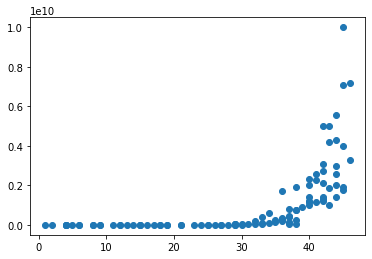

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df.Year_after_1970, df.Transistor_count)
plt.show()


Tatsächlich sieht das nach expontiellem Wachstum aus! Wir wollen dies nun in eine lineare Funktion überführen. Dazu logarithmieren wir die Daten für die Anzahl der Transistoren und fügen diese Daten dem Datensatz hinzu:

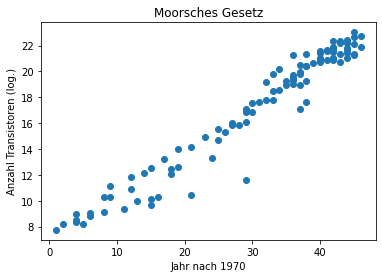

In [15]:
#df.insert(0,"Transistor_count_log", df.Transistor_count)
df["Transistor_count_log"] = np.log(df.Transistor_count)

# Scatterplot
import matplotlib.pyplot as plt
plt.scatter(df.Year_after_1970, df.Transistor_count_log)
plt.xlabel("Jahr nach 1970")
plt.ylabel("Anzahl Transistoren (log.)")
plt.title("Moorsches Gesetz")
plt.show()


Das sieht schon wesentlich "linearer" aus! Nun können wir auch eine Lineare Regression durchführen:

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("Transistor_count_log ~ Year_after_1970", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Transistor_count_log   R-squared:                       0.953
Model:                              OLS   Adj. R-squared:                  0.953
Method:                   Least Squares   F-statistic:                     2056.
Date:                  Thu, 25 Mar 2021   Prob (F-statistic):           5.84e-69
Time:                          08:35:03   Log-Likelihood:                -148.32
No. Observations:                   103   AIC:                             300.6
Df Residuals:                       101   BIC:                             305.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.5692      0.252     26.085      0.000       6.070       7.069
Year_after_1970     0.3503      0.008     45.345      0.000       0.335       0.366
==============================================================================
Omnibus:                       54.248   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.024
Skew:                          -1.782   Prob(JB):                     1.11e-45
Kurtosis:                       8.961   Cond. No.                         80.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pro Jahr wächst also die Anzahl Prozessoren um den Faktor $2^{0,35}$, was ungefähr 2, also einer Verdopplung, entspricht.

 ## Multiple Regression mit Dummy-Variablen
 Bisher hatten wir nur eine unabhängige Variable. Im folgenden Beispiel wollen wir ein Vorhersagemodell für den Mietpreis von Wohnungen in Abhängigkeit von
 
 - der Größe der Wohnung in qm
 - der Lage (Innenstadt, Außenbezirk oder Umland)
 
erstellen. Da es sich bei der Lage um eine kategoriale Variable handelt, müssen wir dieses Feature Dummy-kodieren (One-Hot-Encoding). Praktischerweise übernimmt das für uns die Funktion *C* (für "categorical") aus *statsmodels*. Eine andere Möglichkeit wäre, die Funktion *get_dummies* aus Pandas. Dieser Funktion sollte man auch noch das Argument *drop_first=True* übergeben, damit wir nicht in die "Dummy-Variable-Trap" laufen! Die *C*-Funktion übernimmt das praktischerweise automatisch!

In [17]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/troescherw/datasets/master/wohnungen.csv"
df = pd.read_csv(url, delimiter=";")
df.head()

,Mietpreis,Quadratmeter,Lage
0,1100,87,Umland
1,588,42,Umland
2,850,54,Umland
3,500,33,Umland
4,1900,104,Umland


In [18]:
import statsmodels.formula.api as smf

model = smf.ols("Mietpreis~Quadratmeter+C(Lage)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mietpreis   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     527.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.73e-59
Time:                        08:35:03   Log-Likelihood:                -682.44
No. Observations:                 100   AIC:                             1373.
Df Residuals:                      96   BIC:                             1383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.5884     57.142      0.605      0.546     -78.837     148.014
C(Lage)[T.Innenstadt]   653.1795     52.528     12.435      0.000     548.913     757.446
C(Lage)[T.Umland]      -152.3866     60.274     -2.528      0.013    -272.029     -32.745
Quadratmeter             17.4891      0.489     35.755      0.000      16.518      18.460
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.328
Skew:                          -0.036   Prob(JB):                        0.849
Kurtosis:                       2.729   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wir erkennen an den Koeffizienten, dass nur die Lagen *Innenstadt* und *Umland* vorhanden sind. Die Kategorie *Aussenbezirk* wurde also automatisch entfernt und ist somit in $\beta_0$ eingeflossen.

Somit ergeben sich folgende Erkenntnisse:

- Mit jedem Quadratmeter mehr steigt der Mietpreis einer Wohnung in der Lage "Aussenbezirk" um ca. 17,50 Euro.
- Eine Wohnung im Umland ist gegenüber einer Wohnung im Aussenbezirk im Schnitt um 152 Euro günstiger.
- Eine Wohnung mit Innenstadtlage ist hingegen im Schnitt um ca. 653 Euro teurer als eine Wohnung im Aussenbezirk.

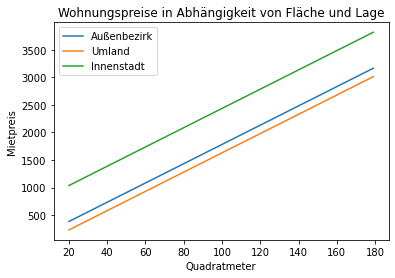

In [19]:
import numpy as np
import matplotlib.pyplot as plt

qm = np.arange(df.Quadratmeter.min(), df.Quadratmeter.max())
mieten_aussen = pd.DataFrame({"Quadratmeter":qm, "Lage":"Aussenbezirk"})
mieten_umland = pd.DataFrame({"Quadratmeter":qm, "Lage":"Umland"})
mieten_innen  = pd.DataFrame({"Quadratmeter":qm, "Lage":"Innenstadt"})

plt.plot(qm, model.predict(mieten_aussen), label="Außenbezirk")
plt.plot(qm, model.predict(mieten_umland), label="Umland")
plt.plot(qm, model.predict(mieten_innen), label="Innenstadt")
plt.legend()
plt.xlabel("Quadratmeter")
plt.ylabel("Mietpreis")
plt.title("Wohnungspreise in Abhängigkeit von Fläche und Lage")
plt.show()